## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>

In [217]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [218]:
X.shape

(50,)

In [219]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

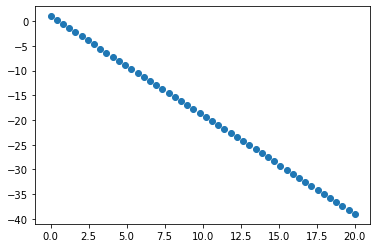

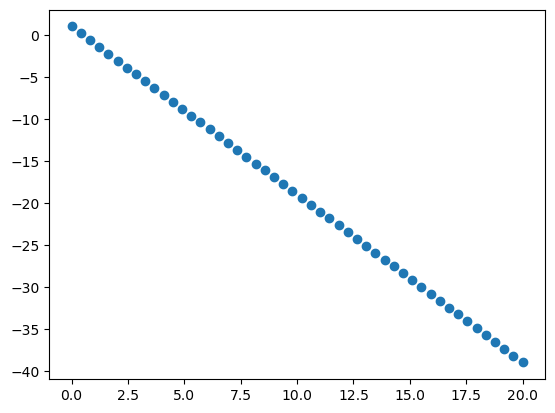

In [5]:
plt.scatter(X,y);

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [21]:

def batchGD(x,y,  alpha,max_iters):
    m=len(y)
    convergence_threshold=0.0001
    theta_0=0
    theta_1=0
    theta_0_history=[]
    theta_1_history=[]
    loss=[]
    hypothesis_history=[]
    for i in range(max_iters+1):
        print("****************** Iteration ", i, "********************")
        # Step 2
        y_pred = theta_0 + theta_1 * x
        hypothesis_history.append(y_pred)
        error_vector = y_pred - y
        print("h(x):", y_pred)
        
        # Step 3
        
        error = y_pred - y
        mse = np.sum(error**2) / (2 * m)
        theta_0_history.append(theta_0)
        theta_1_history.append(theta_1)
        loss.append(mse)
        print("j=", mse)
        
        # Step 4
        gradient_theta_0 = (1 / m) * np.sum(error_vector)
        gradient_theta_1 = (1 / m) * np.dot(error_vector, X)
        gradient_vector=np.array([gradient_theta_0, gradient_theta_1])
       
        print("gradient_vector:", gradient_vector)
        
        gradient_norm = np.linalg.norm(gradient_vector)
        print("gradient_norm:", gradient_norm)
        
        if gradient_norm < convergence_threshold:  #gradient check
            print("Converged!")
            break 
        if (i > 0) and (loss[i-1] - loss[i]) < 0.0001:#cost check
            break

        # Step 5
        theta_0=theta_0 - alpha * gradient_vector[0]
        theta_1=theta_1 - alpha * gradient_vector[1]

       
        print("theta_0_new:", theta_0)
        print("theta_1_new:", theta_1)
    return {
        'theta_0_history': theta_0_history,
        'theta_1_history': theta_1_history,
        'loss': loss,
        'hypothesis_history': hypothesis_history,
        'optimal_theta_0': theta_0,
        'optimal_theta_1': theta_1
    }
        

batchGD(X, y, 0.01,1000)

****************** Iteration  0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
j= 249.88775510204087
gradient_vector: [ 19.        259.3877551]
gradient_norm: 260.08269357432516
theta_0_new: -0.19
theta_1_new: -2.5938775510204084
****************** Iteration  1 ********************
h(x): [ -0.19        -1.24872553  -2.30745106  -3.36617659  -4.42490212
  -5.48362766  -6.54235319  -7.60107872  -8.65980425  -9.71852978
 -10.77725531 -11.83598084 -12.89470637 -13.9534319  -15.01215743
 -16.07088297 -17.1296085  -18.18833403 -19.24705956 -20.30578509
 -21.36451062 -22.42323615 -23.48196168 -24.54068721 -25.59941274
 -26.65813828 -27.71686381 -28.77558934 -29.83431487 -30.8930404
 -31.95176593 -33.01049146 -34.06921699 -35.12794252 -36.18666805
 -37.24539359 -38.30411912 -39.36284465 -40.42157018 -41.48029571
 -42.53902124 -43.59774677 -44.6564723  -45.715197

{'theta_0_history': [0,
  -0.19,
  -0.11871224489795916,
  -0.1400290374843815,
  -0.1285390010768472,
  -0.12868503781961108,
  -0.12471757225197835,
  -0.12221786850398982,
  -0.119208028325816,
  -0.11638894806195033,
  -0.11351222049051404,
  -0.11066584996100158,
  -0.10781862430952781,
  -0.1049815790473014,
  -0.10215077813921407,
  -0.09932759118909991,
  -0.09651150766815768,
  -0.09370268338813997,
  -0.09090103808924042,
  -0.08810657523417449,
  -0.08531926868029556,
  -0.08253910284024521,
  -0.07976605844977236,
  -0.07700011761113007,
  -0.07424126200564828,
  -0.07148947352699489,
  -0.06874473405660077,
  -0.06600702554308248,
  -0.0632763299739358,
  -0.06055262938540623,
  -0.05783590585883099,
  -0.055126141521775515,
  -0.05242331854747141,
  -0.04972741915485664,
  -0.047038425608402816,
  -0.04435632021801816,
  -0.04168108533892426,
  -0.03901270337154242,
  -0.03635115676137693,
  -0.03369642799890003,
  -0.03104849961943651,
  -0.028407354203048827,
  -0.02577

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [7]:
result=batchGD(X, y, 0.0005,300)

****************** Iteration  0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
j= 249.88775510204087
gradient_vector: [ 19.        259.3877551]
gradient_norm: 260.08269357432516
theta_0_new: -0.0095
theta_1_new: -0.12969387755102044
****************** Iteration  1 ********************
h(x): [-0.0095     -0.06243628 -0.11537255 -0.16830883 -0.22124511 -0.27418138
 -0.32711766 -0.38005394 -0.43299021 -0.48592649 -0.53886277 -0.59179904
 -0.64473532 -0.6976716  -0.75060787 -0.80354415 -0.85648042 -0.9094167
 -0.96235298 -1.01528925 -1.06822553 -1.12116181 -1.17409808 -1.22703436
 -1.27997064 -1.33290691 -1.38584319 -1.43877947 -1.49171574 -1.54465202
 -1.5975883  -1.65052457 -1.70346085 -1.75639713 -1.8093334  -1.86226968
 -1.91520596 -1.96814223 -2.02107851 -2.07401479 -2.12695106 -2.17988734
 -2.23282362 -2.28575989 -2.33869617 -2.39163244 -2.44456872 -2.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.0095
theta_1_new : -0.12969387

#### Calculate r2 score

In [8]:
from sklearn.metrics import r2_score

In [9]:
y_Predict=result['optimal_theta_0']+result['optimal_theta_1']*X

In [10]:
r2_score(y,y_Predict)

0.9976312051531401

r2_score: 0.9975395965150151


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

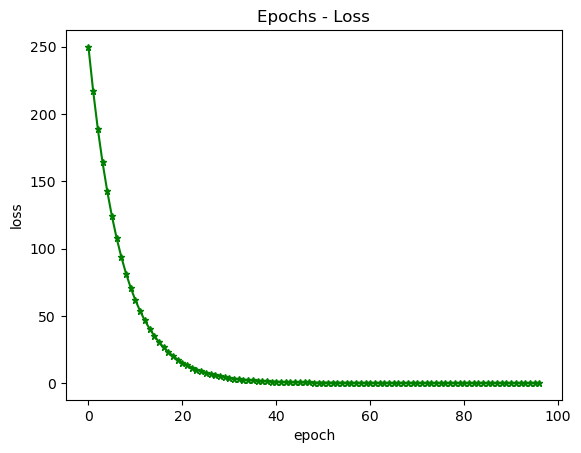

In [11]:

plt.plot(result['loss'], marker='*', markersize=5,color='green')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Epochs - Loss')
plt.show()




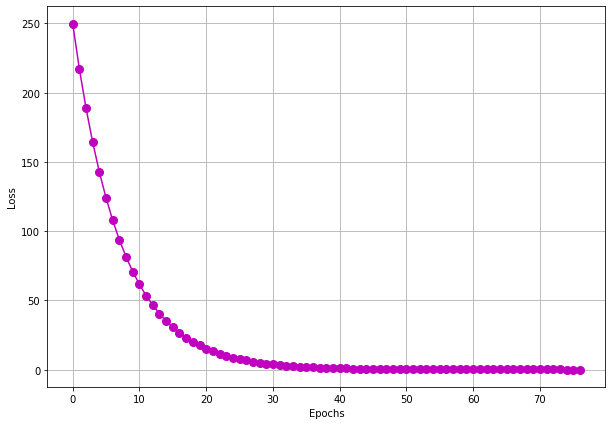

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

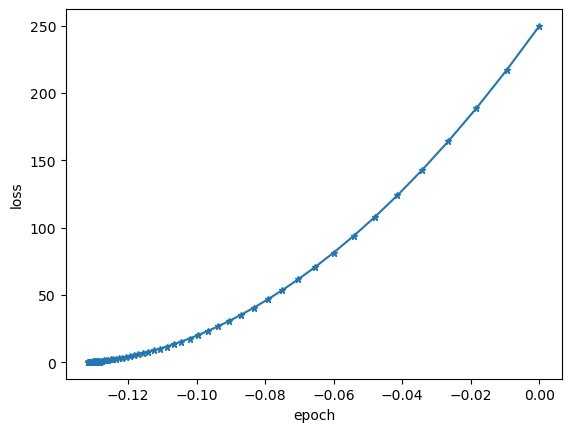

In [12]:
plt.plot(result['theta_0_history'],result['loss'], marker='*', markersize=5)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

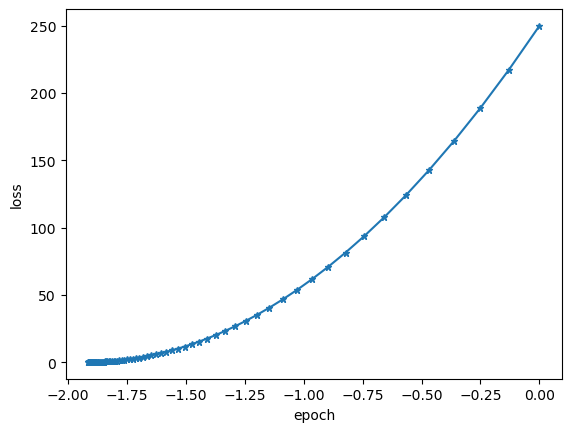

In [13]:
plt.plot(result['theta_1_history'],result['loss'], marker='*', markersize=5)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

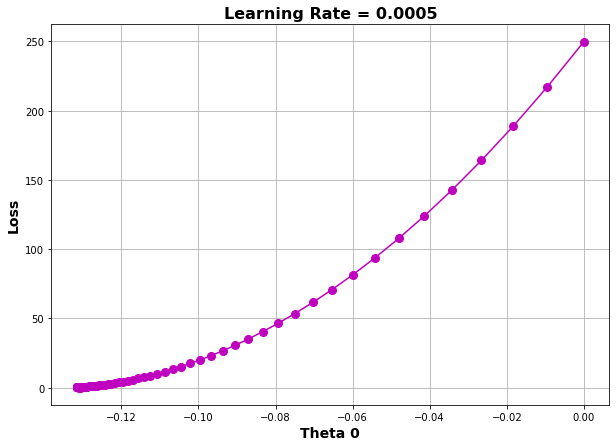

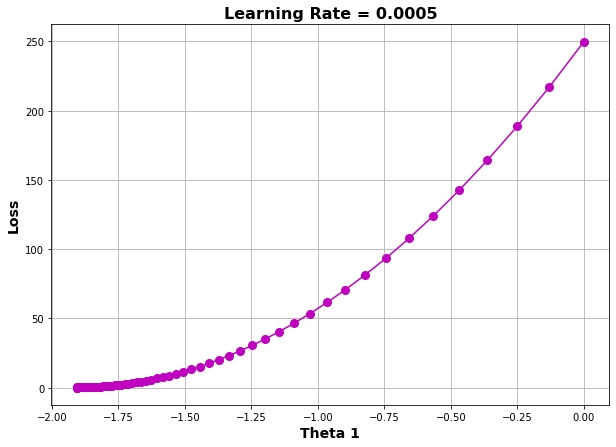

#### Plot all regression lines till converge

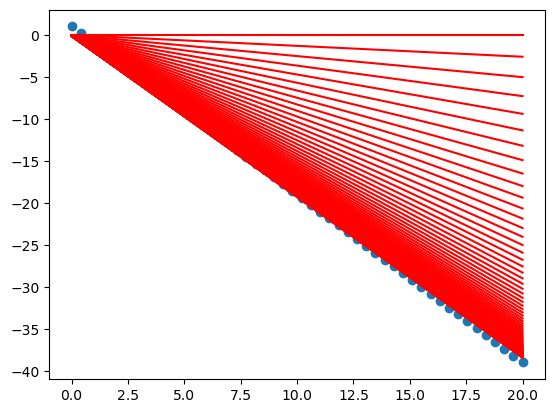

In [14]:
plt.scatter(X,y)
for i in result['hypothesis_history']:
    plt.plot(X,i, color='red')
plt.show()

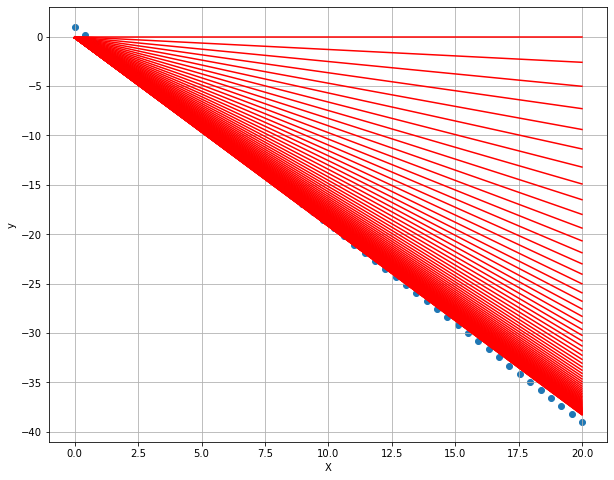

#### Plot the best regression line

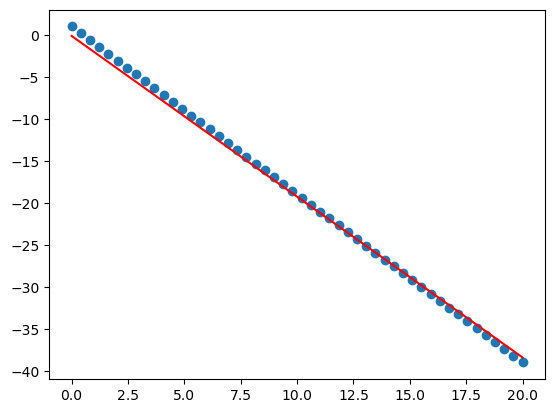

In [15]:
h=result['hypothesis_history']
plt.scatter(X,y)
plt.plot(X,h[-1],color='red')
plt.show()

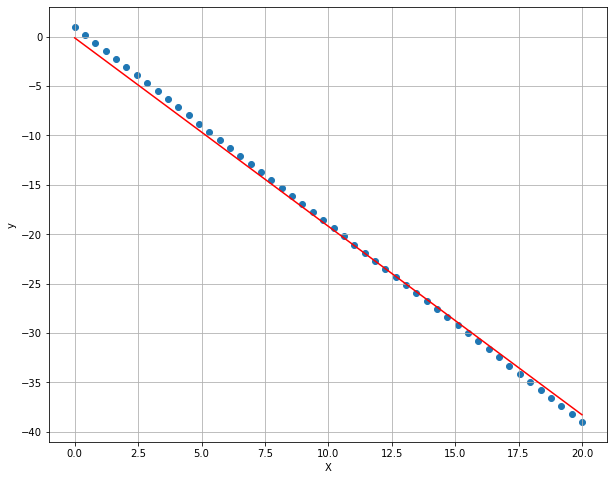

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [16]:
test=batchGD=(X,y,.00005,1000)

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.00095
theta_1_new : -0.0129693

In [19]:
r2_score(y,y_Predict)

0.9976312051531401

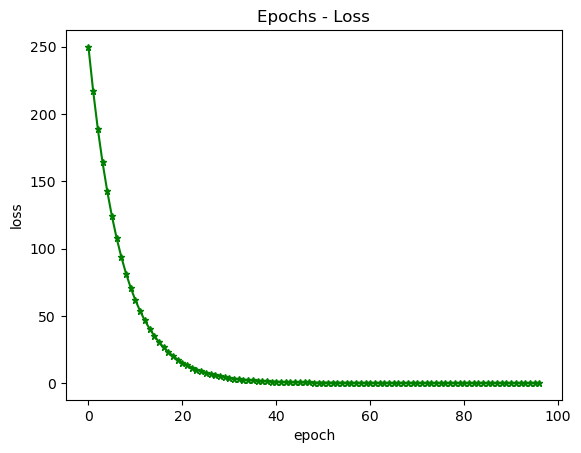

In [81]:


plt.plot(result['loss'], marker='*', markersize=5,color='green')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Epochs - Loss')
plt.show()


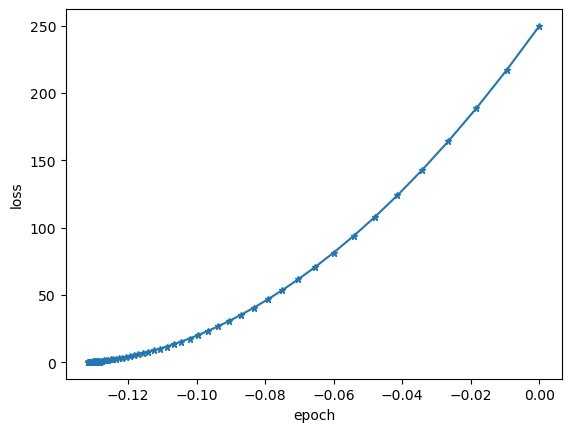

In [82]:

plt.plot(result['theta_0_history'],result['loss'], marker='*', markersize=5)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

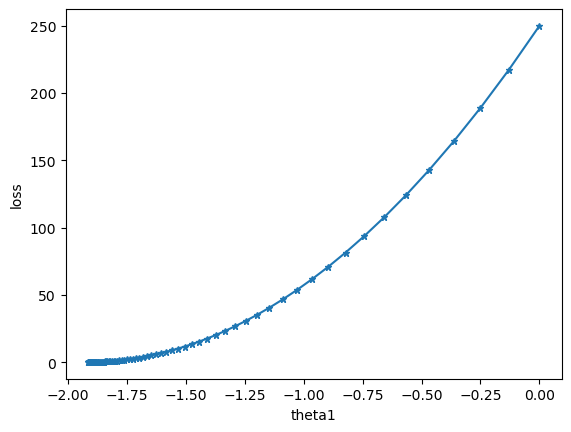

In [83]:
plt.plot(result['theta_1_history'],result['loss'], marker='*', markersize=5)
plt.xlabel('theta1')
plt.ylabel('loss')
plt.show()

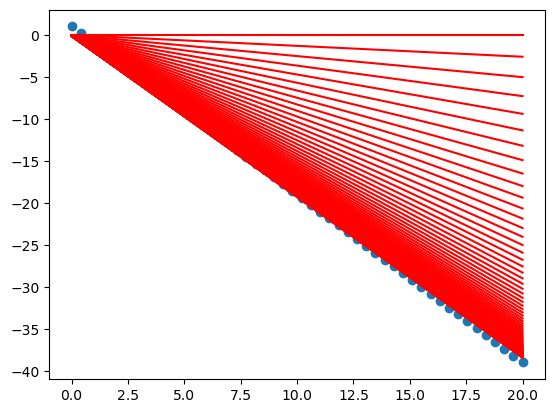

In [85]:
plt.scatter(X,y)
for i in result['hypothesis_history']:
    plt.plot(X,i, color='red')
plt.show()

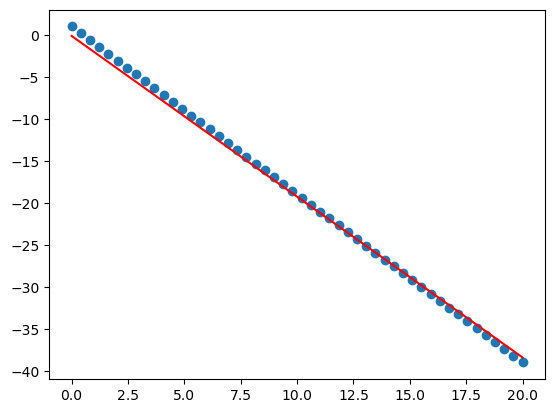

In [84]:

h=result['hypothesis_history']
plt.scatter(X,y)
plt.plot(X,h[-1],color='red')
plt.show()

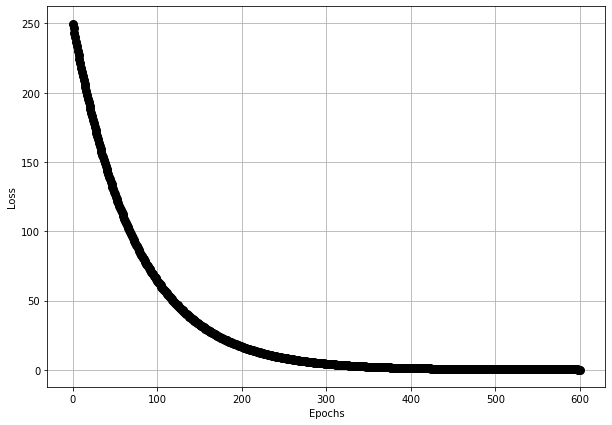

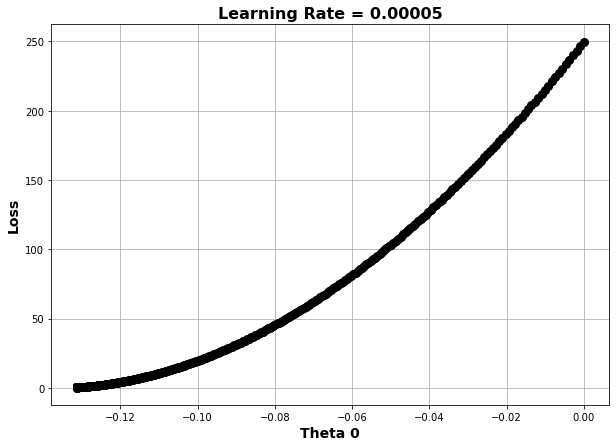

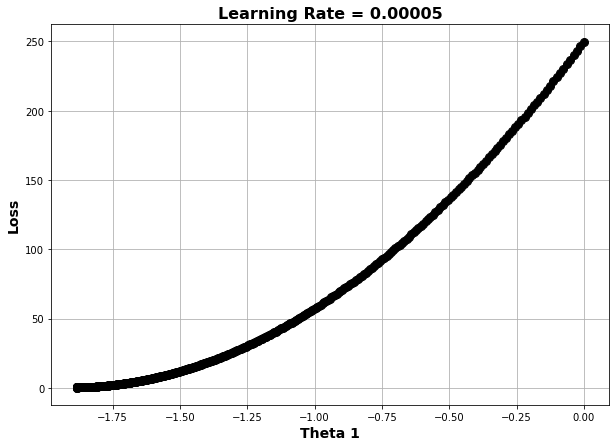

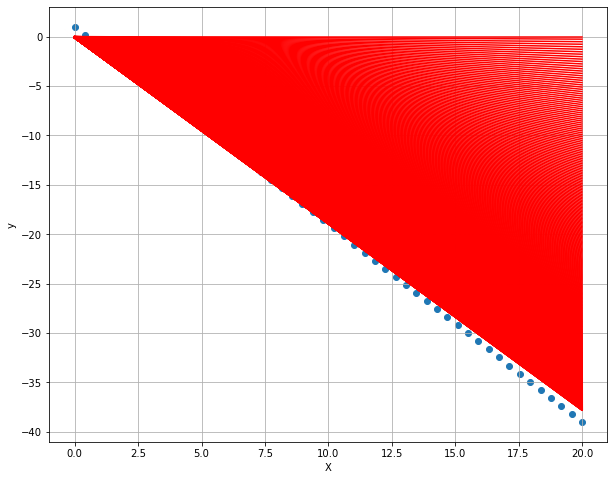

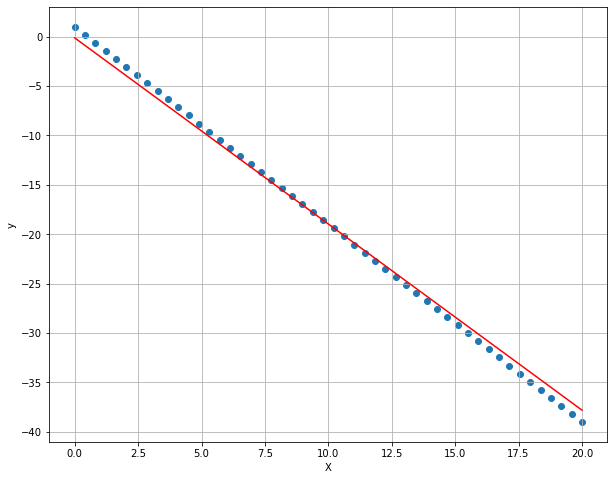

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [22]:
test2=batchGD(X,y,.005,300)

****************** Iteration  0 ********************
h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
j= 249.88775510204087
gradient_vector: [ 19.        259.3877551]
gradient_norm: 260.08269357432516
theta_0_new: -0.095
theta_1_new: -1.2969387755102042
****************** Iteration  1 ********************
h(x): [ -0.095       -0.62436277  -1.15372553  -1.6830883   -2.21245106
  -2.74181383  -3.27117659  -3.80053936  -4.32990212  -4.85926489
  -5.38862766  -5.91799042  -6.44735319  -6.97671595  -7.50607872
  -8.03544148  -8.56480425  -9.09416701  -9.62352978 -10.15289254
 -10.68225531 -11.21161808 -11.74098084 -12.27034361 -12.79970637
 -13.32906914 -13.8584319  -14.38779467 -14.91715743 -15.4465202
 -15.97588297 -16.50524573 -17.0346085  -17.56397126 -18.09333403
 -18.62269679 -19.15205956 -19.68142232 -20.21078509 -20.74014786
 -21.26951062 -21.79887339 -22.32823615 -22.85759

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

j = 249.88775510204084

Gradient Vector:
[[ 19.       ]
 [259.3877551]]

Gradient Vector Norm:
260.08269357432516

theta_0_new : -0.095
theta_1_new : -1.296938775

In [30]:
y_pred=test2['optimal_theta_0']+result['optimal_theta_1']*X

In [31]:
r2_score(y,y_pred)

0.9980886752726612

r2_score: 0.9976200723230484


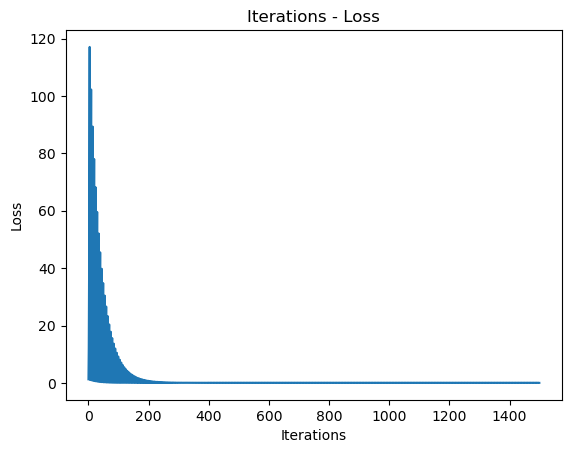

In [86]:

plt.plot(loss_history)
plt.title('Iterations - Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

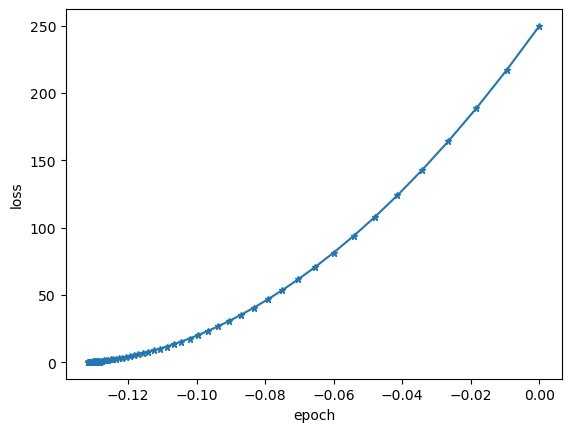

In [87]:

# plt.show()
plt.plot(result['theta_0_history'],result['loss'], marker='*', markersize=5)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

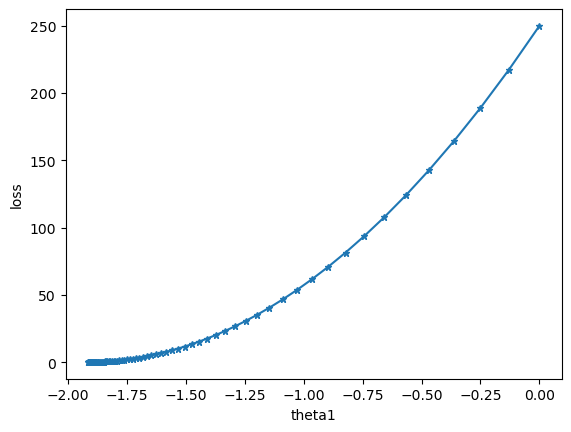

In [89]:

# plt.show()
plt.plot(result['theta_1_history'],result['loss'], marker='*', markersize=5)
plt.xlabel('theta1')
plt.ylabel('loss')
plt.show()

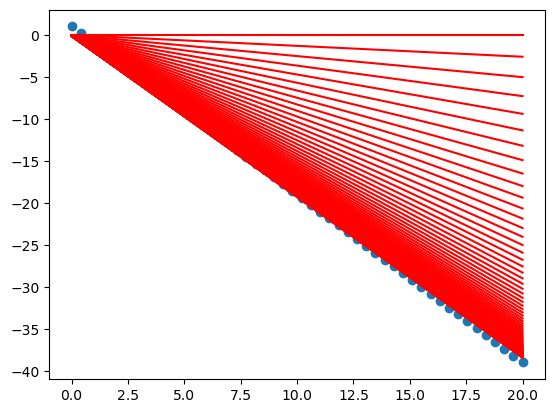

In [91]:
plt.scatter(X,y)
for i in result['hypothesis_history']:
    plt.plot(X,i, color='red')
plt.show()

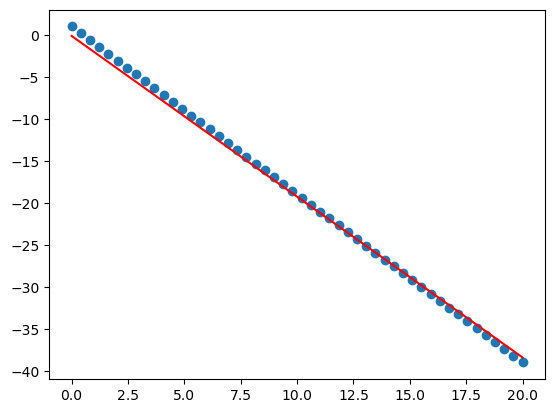

In [90]:

h=result['hypothesis_history']
plt.scatter(X,y)
plt.plot(X,h[-1],color='red')
plt.show()


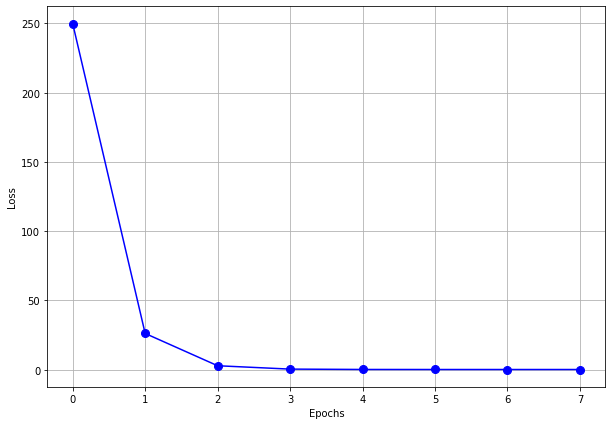

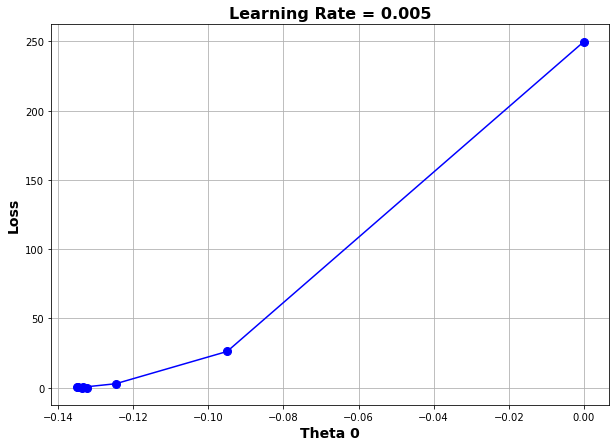

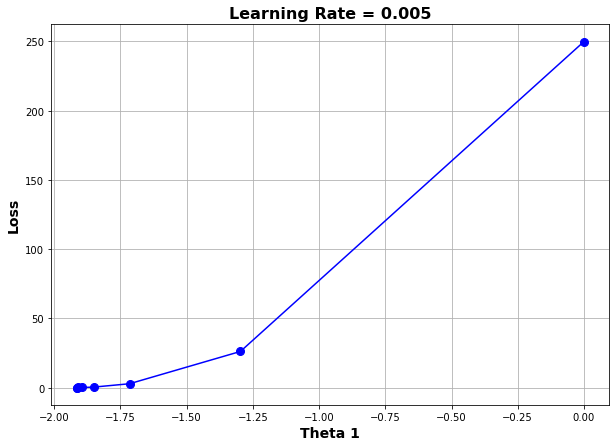

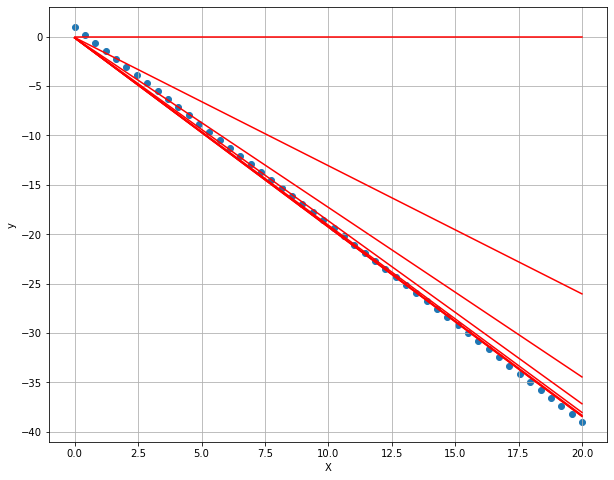

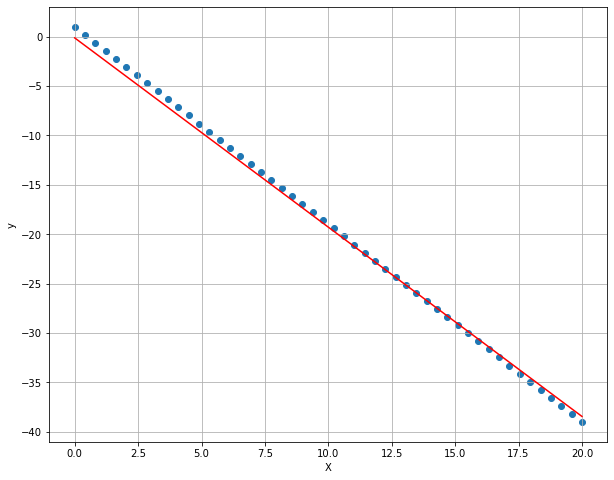

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>
- <font color='red'><b>To obtain the same results use np.random.seed(101) before shuffle</b></font>

In [220]:
data = np.column_stack((X, y))
data

array([[  0.        ,   1.        ],
       [  0.40816327,   0.18367347],
       [  0.81632653,  -0.63265306],
       [  1.2244898 ,  -1.44897959],
       [  1.63265306,  -2.26530612],
       [  2.04081633,  -3.08163265],
       [  2.44897959,  -3.89795918],
       [  2.85714286,  -4.71428571],
       [  3.26530612,  -5.53061224],
       [  3.67346939,  -6.34693878],
       [  4.08163265,  -7.16326531],
       [  4.48979592,  -7.97959184],
       [  4.89795918,  -8.79591837],
       [  5.30612245,  -9.6122449 ],
       [  5.71428571, -10.42857143],
       [  6.12244898, -11.24489796],
       [  6.53061224, -12.06122449],
       [  6.93877551, -12.87755102],
       [  7.34693878, -13.69387755],
       [  7.75510204, -14.51020408],
       [  8.16326531, -15.32653061],
       [  8.57142857, -16.14285714],
       [  8.97959184, -16.95918367],
       [  9.3877551 , -17.7755102 ],
       [  9.79591837, -18.59183673],
       [ 10.20408163, -19.40816327],
       [ 10.6122449 , -20.2244898 ],
 

In [209]:
np.random.seed(101) 
np.random.shuffle(data)
data

array([[ 15.10204082, -29.20408163],
       [  5.71428571, -10.42857143],
       [  8.57142857, -16.14285714],
       [ 13.06122449, -25.12244898],
       [  8.97959184, -16.95918367],
       [  0.40816327,   0.18367347],
       [ 10.6122449 , -20.2244898 ],
       [ 18.7755102 , -36.55102041],
       [ 17.14285714, -33.28571429],
       [ 19.18367347, -37.36734694],
       [  6.53061224, -12.06122449],
       [  9.79591837, -18.59183673],
       [  2.85714286,  -4.71428571],
       [ 18.36734694, -35.73469388],
       [  7.34693878, -13.69387755],
       [  1.2244898 ,  -1.44897959],
       [ 16.73469388, -32.46938776],
       [ 12.24489796, -23.48979592],
       [  6.12244898, -11.24489796],
       [  8.16326531, -15.32653061],
       [ 17.55102041, -34.10204082],
       [ 15.51020408, -30.02040816],
       [ 17.95918367, -34.91836735],
       [ 15.91836735, -30.83673469],
       [  4.08163265,  -7.16326531],
       [ 20.        , -39.        ],
       [ 10.20408163, -19.40816327],
 

In [221]:
X=np.array(data[0:,0])
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [222]:
y=np.array(data[0:,1])
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

In [42]:
X.shape, y.shape

((50,), (50,))

In [212]:
def Stochastic(x, Y, alpha, epochs):
     
    loss_historY, theta0_historY, theta1_historY,hYpothesis_historY = [],[], [], []
    theta0, theta1 = 0, 0
    m=len(x)
    for i in range(epochs):
        print("****************** Epoch ", i, "********************")
        for j in range(m):
           
            Y_pred  = theta0 + theta1 * x[j]
#             print("h(x):\n",Y_pred)
            loss = np.square(Y_pred - Y[j]) / 2
#             print("loss :",loss)

            # Add previous thetas and loss 
            loss_historY.append(loss)
            theta0_historY.append(theta0)
            theta1_historY.append(theta1)
            hYpothesis_historY.append(Y_pred)

            # Gradient thetas
            g_theta0 = Y_pred - Y[j]
            g_theta1 = (Y_pred - Y[j]) * x[j]

            #  gradient check
            gradient_norm = np.linalg.norm([g_theta0, g_theta0])
#             print(f"Gradient norm of {j} : {gradient_norm}")
            # Update thetas
            theta0 = theta0 - (alpha * g_theta0)
            theta1 = theta1 - (alpha * g_theta1)  
        if gradient_norm < 0.001: 
            print("converged")
            return theta0_historY, theta1_historY, loss_historY,hYpothesis_historY, loss, theta0, theta1, i
        if (i != 0) and (abs(loss_historY[-1]-loss_historY[-(m+1)])<0.001):
            print("converged")
            return theta0_historY, theta1_historY, loss_historY,hYpothesis_historY, loss, theta0, theta1, i
                             
                
            
        print("theta0_new :",theta0)
        print("theta1_new :",theta1)

            
        
        
    

    return theta0_historY, theta1_historY, loss_historY,hYpothesis_historY, loss, theta0, theta1, i

theta0_historY, theta1_historY, loss_historY,hYpothesis_historY, loss, theta0, theta1, i = Stochastic(X,y, 0.0005, 300)

****************** Epoch  0 ********************
theta0_new : -0.12761222125212127
theta1_new : -1.8592841835063174
****************** Epoch  1 ********************
theta0_new : -0.12397684636948911
theta1_new : -1.909800583000258
****************** Epoch  2 ********************
converged


##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [206]:
theta0_history, theta1_history, loss_history,hypothsis_history, loss, theta0, theta1, num_iterations \
  = Stochastic(X,y,0.0005,300)

****************** Epoch  0 ********************
theta0_new : -0.18688381292388795
theta1_new : -1.8805232259550646
****************** Epoch  1 ********************
theta0_new : -0.18481430862642031
theta1_new : -1.9314384030223104
****************** Epoch  2 ********************
theta0_new : -0.17771259720041677
theta1_new : -1.9332054504374752
****************** Epoch  3 ********************
converged


r2_score: 0.9976567971049898


In [198]:
y_predict = theta0 + theta1 * X
r2_score(y, y_predict)

0.9999216262611195

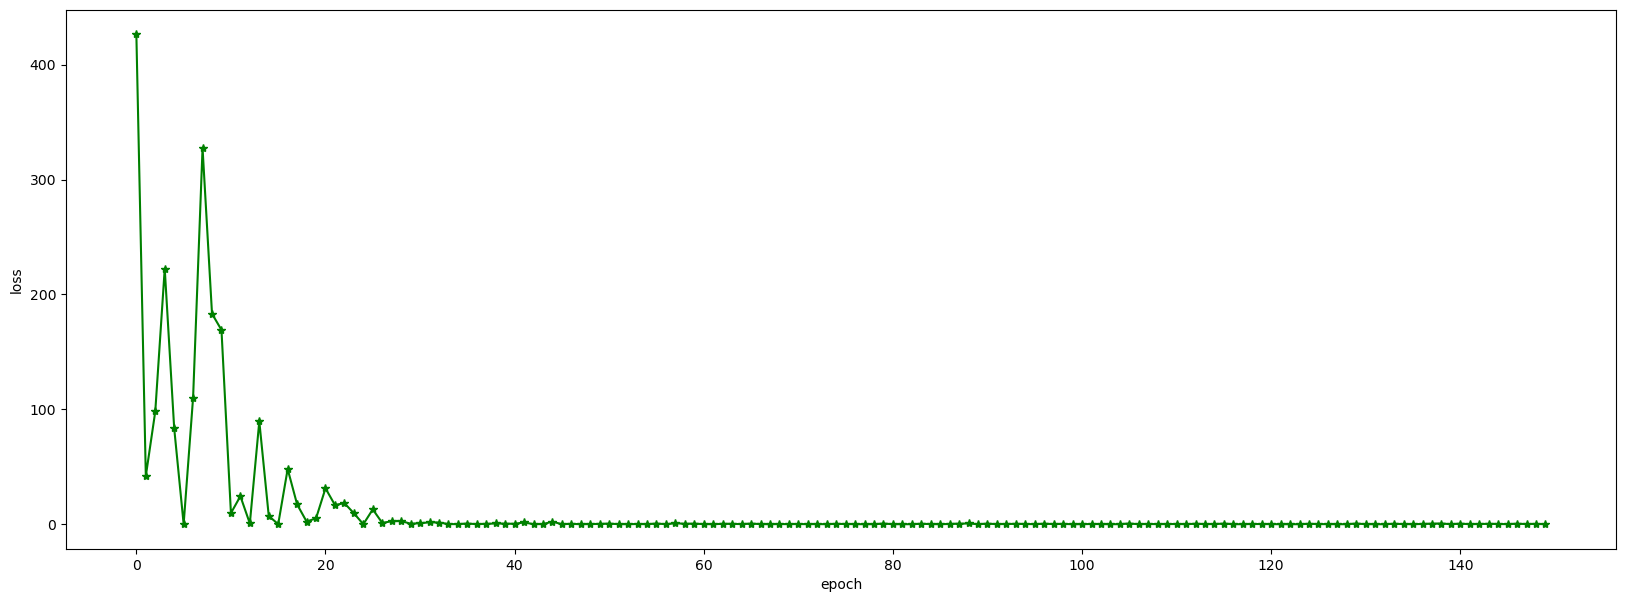

In [213]:

# epoch = list(range(len(loss_historY)))
plt.figure(figsize=(20, 7))
plt.plot(loss_historY, marker='*',color="green")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

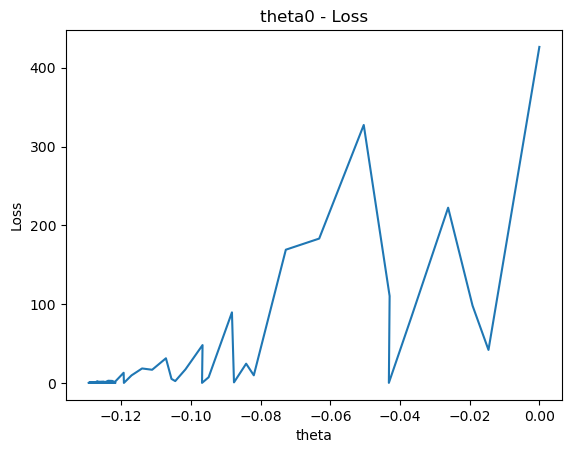

In [109]:

plt.plot(theta0_history,loss_history)
plt.title('theta0 - Loss')
plt.xlabel('theta')
plt.ylabel('Loss')
plt.show()

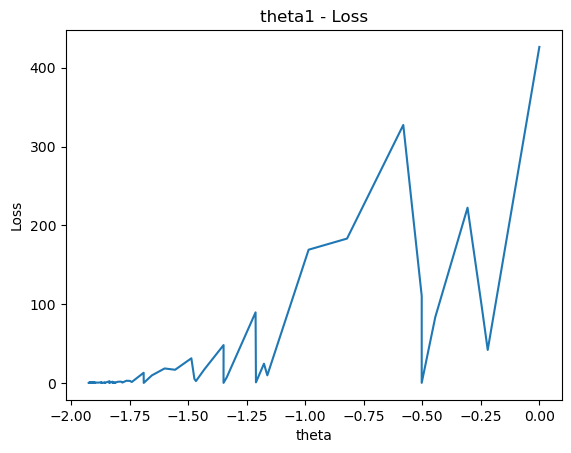

In [110]:
plt.plot(theta1_history,loss_history)
plt.title('theta1 - Loss')
plt.xlabel('theta')
plt.ylabel('Loss')
plt.show()

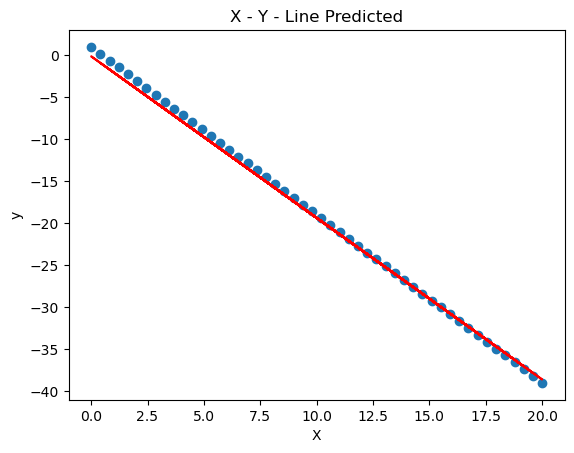

In [111]:

plt.scatter(X,y)
plt.plot(X, y_predict, color='r')
plt.title('X - Y - Line Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

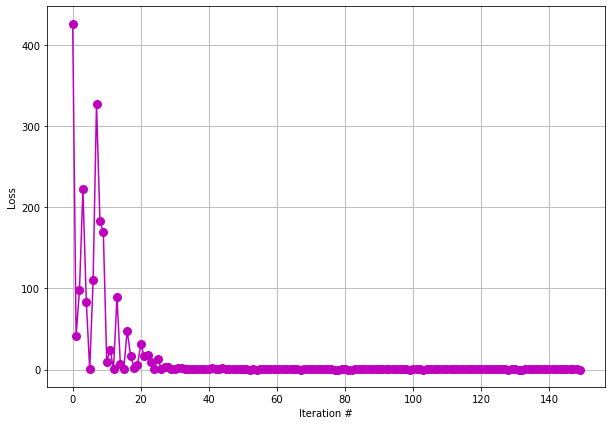

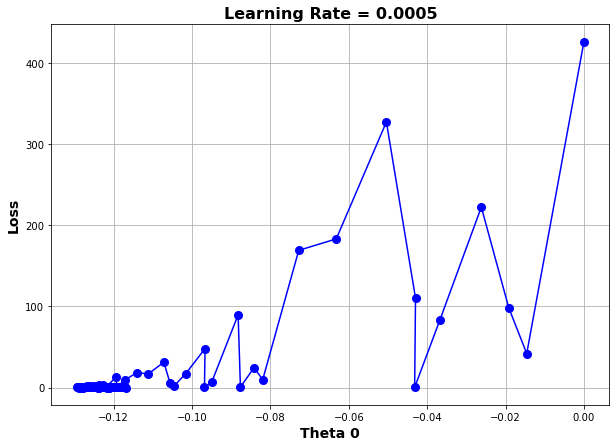

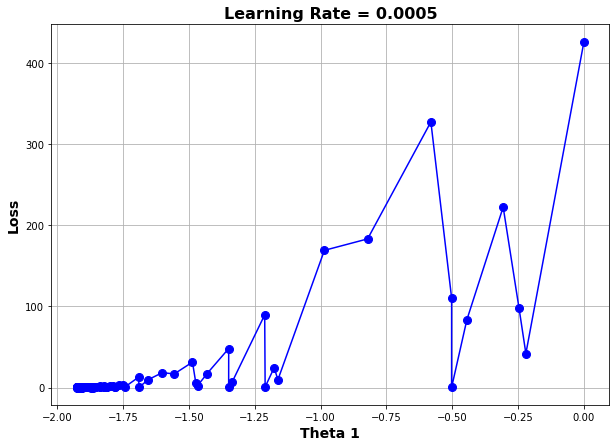

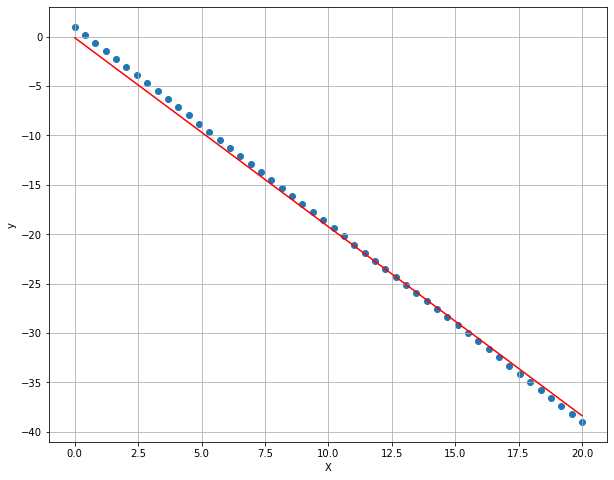

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [112]:
heta0_history, theta1_history, loss_history,hypothsis_history, loss, theta0, theta1, num_iterations \
 =Stochastic(X,y,.0001,300)

****************** Epoch  0 ********************
theta0_new : -0.0684094452130673
theta1_new : -0.9500743631688013
****************** Epoch  1 ********************
theta0_new : -0.10214664348275128
theta1_new : -1.428733851630339
****************** Epoch  2 ********************
theta0_new : -0.11841844022588549
theta1_new : -1.6699154908906342
****************** Epoch  3 ********************
theta0_new : -0.12589287520313883
theta1_new : -1.7914663162395936
****************** Epoch  4 ********************
theta0_new : -0.12893651888789534
theta1_new : -1.8527524058213278
****************** Epoch  5 ********************
theta0_new : -0.12974905345931528
theta1_new : -1.8836797409849695
****************** Epoch  6 ********************
theta0_new : -0.1294385794618213
theta1_new : -1.8993136208211674
****************** Epoch  7 ********************
theta0_new : -0.12856330732005583
theta1_new : -1.9072432708885727
****************** Epoch  8 ********************
converged


****************** Epoch 0 ********************

Cost = 77.08339441916262

Gradient Vector:
[[ 12.41639194]
 [157.10536742]]

Gradient Vector Norm:
157.59525139074904

theta_0_new : -0.06716780601894395
theta_1_new : -0.9343638264268326

****************** Epoch 1 ********************

Cost = 19.384194190624033

Gradient Vector:
[[ 6.22642661]
 [78.78335716]]

Gradient Vector Norm:
79.02901842704571

theta_0_new : -0.10152400082133746
theta_1_new : -1.4208555159144907

****************** Epoch 2 ********************

Cost = 4.830561509456486

Gradient Vector:
[[ 3.10823471]
 [39.3286841 ]]

Gradient Vector Norm:
39.45131830456044

theta_0_new : -0.1181076167547815
theta_1_new : -1.665982622480747

****************** Epoch 3 ********************

Cost = 1.181899543652157

Gradient Vector:
[[ 1.53746515]
 [19.45364067]]

Gradient Vector Norm:
19.514300769285008

theta_0_new : -0.12573912868814405
theta_1_new : -1.7895209521723126

****************** Epoch 4 ********************

Cost = 0

In [122]:
y_predict=theta0 + theta1 * X
r2_score(y,y_predict)

0.9959500212467105

r2_score =  0.9976377310288631


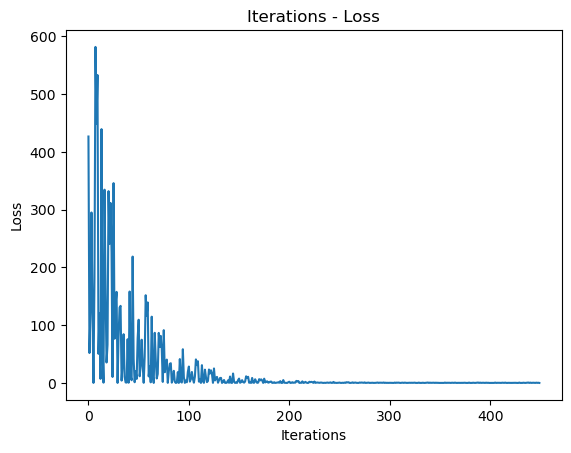

In [115]:
plt.plot(np.arange(0, (num_iterations+1) * len(X) ) , loss_history)
plt.title('Iterations - Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


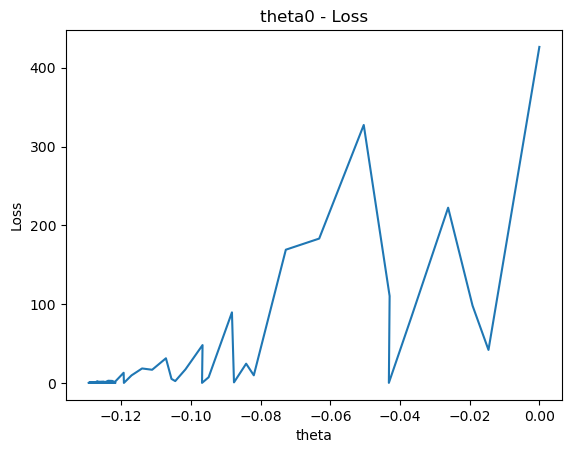

In [117]:
plt.plot(theta0_historY,loss_historY)
plt.title('theta0 - Loss')
plt.xlabel('theta')
plt.ylabel('Loss')
plt.show()

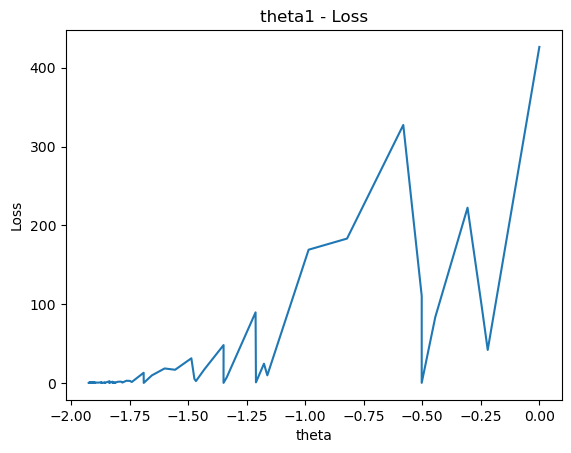

In [119]:
plt.plot(theta1_historY,loss_historY)
plt.title('theta1 - Loss')
plt.xlabel('theta')
plt.ylabel('Loss')
plt.show()

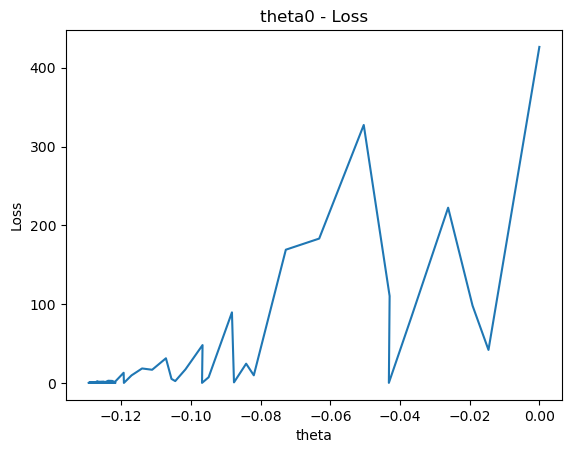

In [120]:
plt.plot(theta0_historY,loss_historY)
plt.title('theta0 - Loss')
plt.xlabel('theta')
plt.ylabel('Loss')
plt.show()

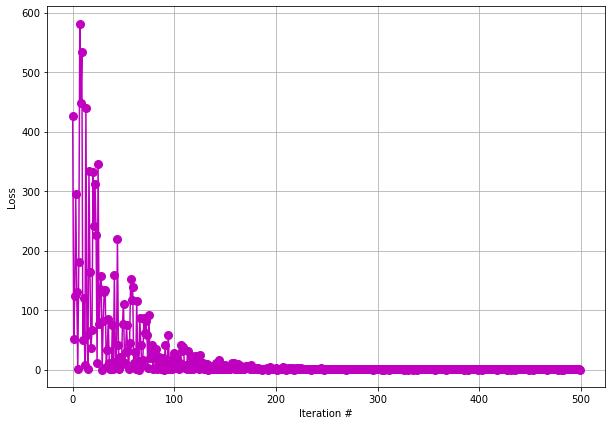

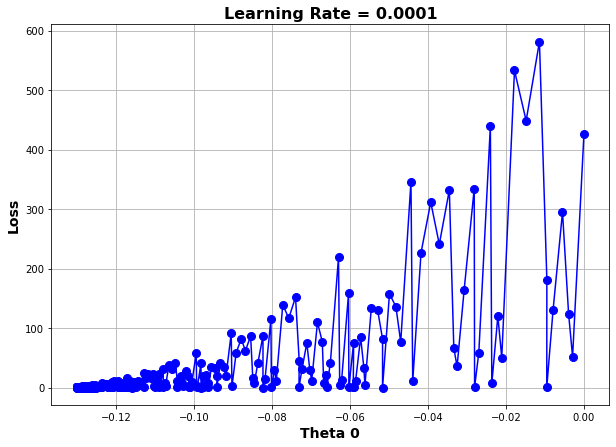

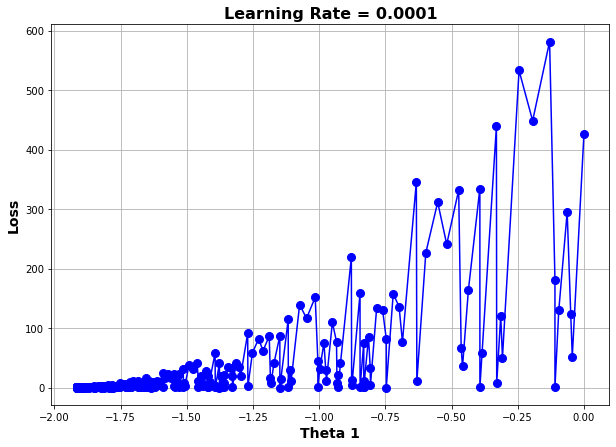

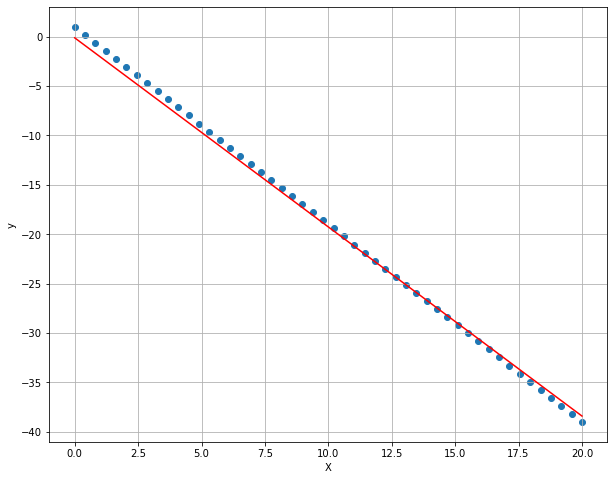

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [153]:
heta0_history, theta1_history, loss_history,hypothsis_history, loss, theta0, theta1, num_iterations \
  = Stochastic(X,y,0.00007,300)

****************** Epoch  0 ********************
theta0_new : -0.055827970443774175
theta1_new : -0.729265813440941
****************** Epoch  1 ********************
theta0_new : -0.09004607863201486
theta1_new : -1.1813815795760407
****************** Epoch  2 ********************
theta0_new : -0.11086810402564744
theta1_new : -1.4616858542466453
****************** Epoch  3 ********************
theta0_new : -0.12338595053131411
theta1_new : -1.6354803465933123
****************** Epoch  4 ********************
theta0_new : -0.13075620209905314
theta1_new : -1.7432470357309888
****************** Epoch  5 ********************
theta0_new : -0.1349356948769903
theta1_new : -1.8100815991722867
****************** Epoch  6 ********************
converged


****************** Epoch 0 ********************

Cost = 115.77496572621477

Gradient Vector:
[[ 15.21676482]
 [192.53865685]]

Gradient Vector Norm:
193.13902845642275

theta_0_new : -0.051597422781105656
theta_1_new : -0.7142745972914493

****************** Epoch 1 ********************

Cost = 44.27618208821564

Gradient Vector:
[[  9.41022657]
 [119.06817298]]

Gradient Vector Norm:
119.43944985086782

theta_0_new : -0.08426215899391709
theta_1_new : -1.1705968581887245

****************** Epoch 2 ********************

Cost = 16.881779141921317

Gradient Vector:
[[ 5.81064181]
 [73.52240662]]

Gradient Vector Norm:
73.75166325784151

theta_0_new : -0.10412365552618537
theta_1_new : -1.4535104710027915

****************** Epoch 3 ********************

Cost = 6.40532844123651

Gradient Vector:
[[ 3.5791978 ]
 [45.28780888]]

Gradient Vector Norm:
45.42902475523053

theta_0_new : -0.11604848037218528
theta_1_new : -1.6289240843931025

****************** Epoch 4 ********************

Cos

r2_score =  0.9976194344219209


In [154]:
y_predict=theta0 + theta1 * X
r2_score(y,y_predict)

0.9936201142229295

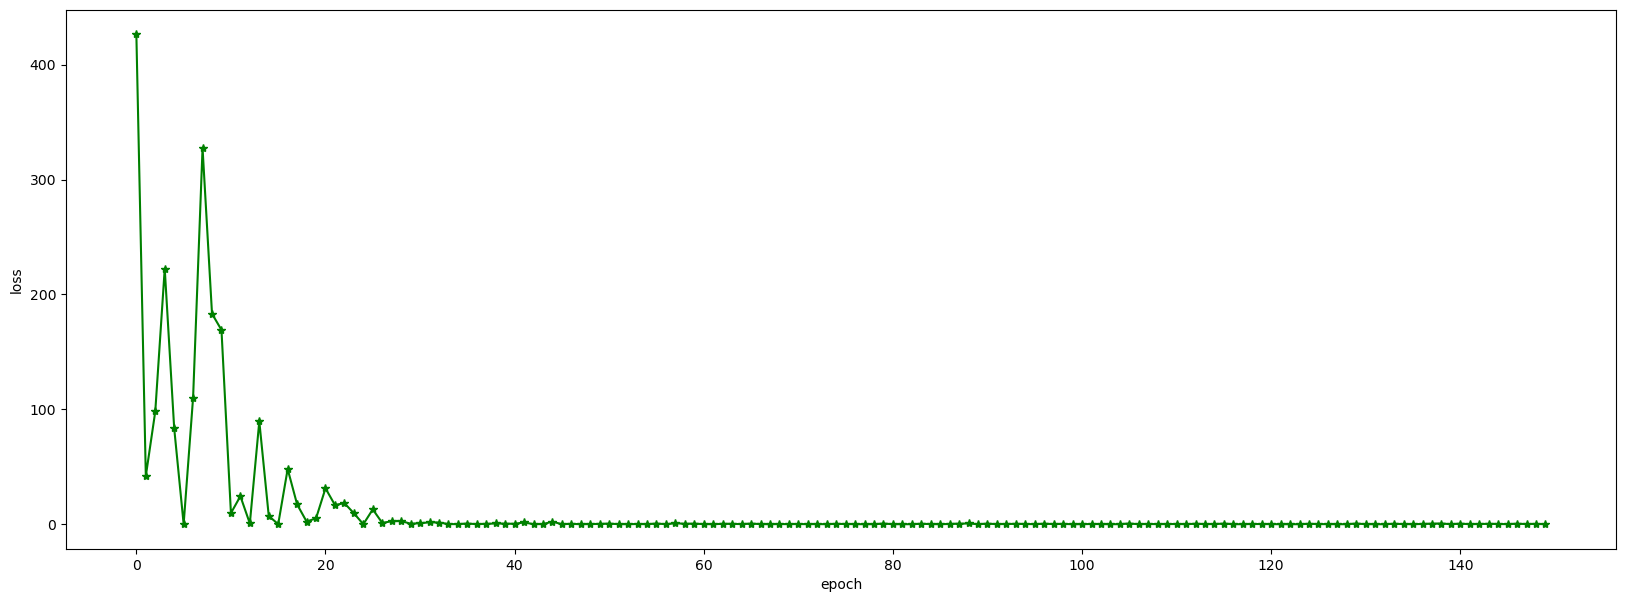

In [214]:
# epoch = list(range(len(loss_historY)))
plt.figure(figsize=(20, 7))
plt.plot(loss_historY, marker='*',color="green")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


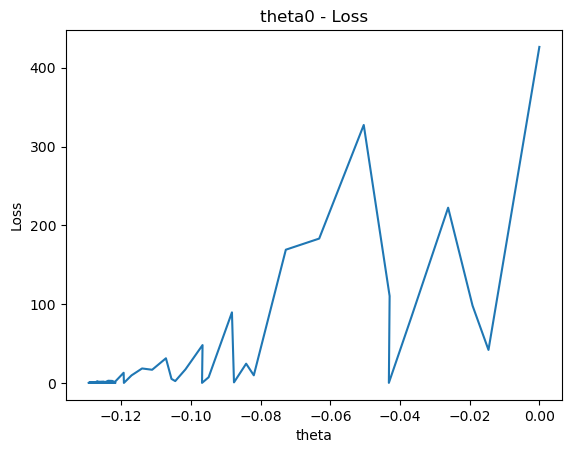

In [127]:
plt.plot(theta0_historY,loss_historY)
plt.title('theta0 - Loss')
plt.xlabel('theta')
plt.ylabel('Loss')
plt.show()

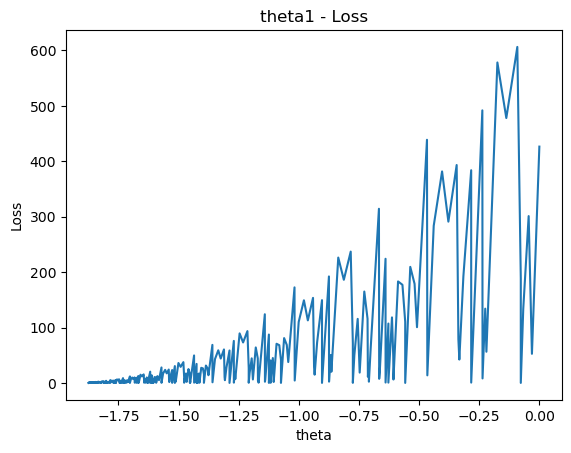

In [128]:
plt.plot(theta1_history,loss_history)
plt.title('theta1 - Loss')
plt.xlabel('theta')
plt.ylabel('Loss')
plt.show()

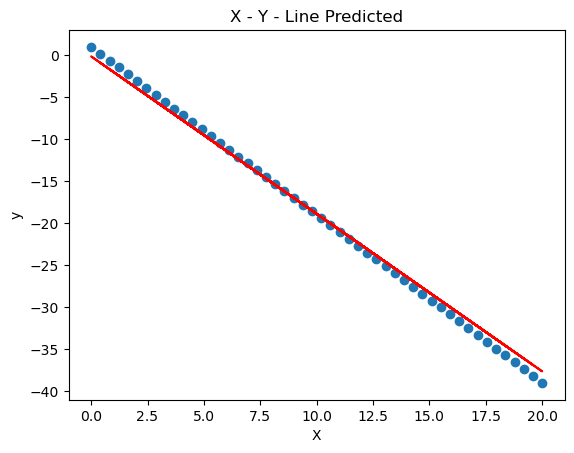

In [129]:

plt.scatter(X,y)
plt.plot(X, y_predict, color='r')
plt.title('X - Y - Line Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

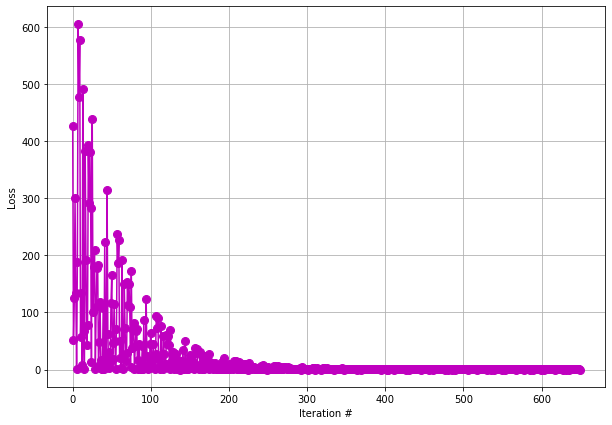

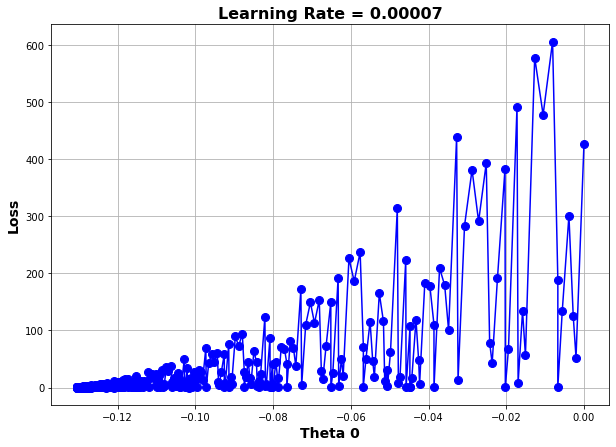

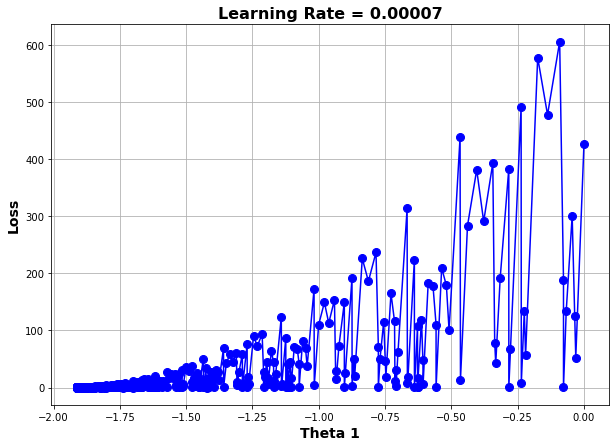

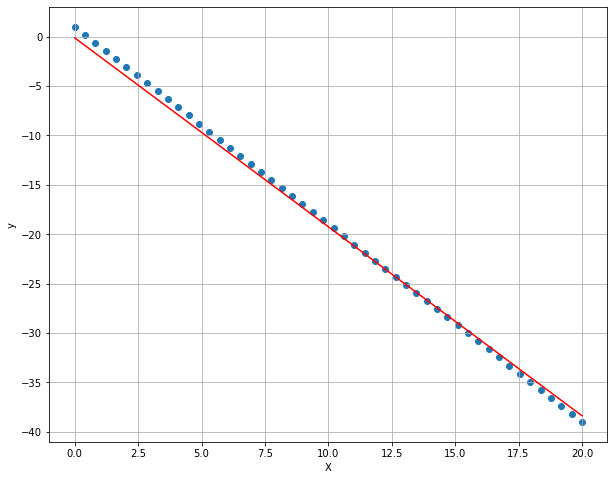

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>
- <font color='red'><b>To obtain the same results use np.random.seed(101) before shuffle</b></font>

In [223]:
def miniBatch(X, y, alpha, max_iters, b,batch_size):
    m = len(X) 
    loss_history, theta0_history, theta1_history = [], [], []
    theta0, theta1 = 0, 0
    
 
    
    for i in range(max_iters):

        for j in range(0, m, batch_size):
            X_batch = X[j: j +batch_size] 
            y_batch = y[j: j+batch_size]

            y_pred = theta0 + theta1 * X_batch
#             print("h(x):\n",y_pred)
            loss=np.mean((y_pred - y_batch)**2)
#             print("loss:\n",loss)

            loss_history.append(loss)
            theta0_history.append(theta0)
            theta1_history.append(theta1)

            # Gradient thetas
            g_theta0 = sum(y_pred - y_batch) / b
            g_theta1 = sum((y_pred - y_batch) * X_batch) / b
#             print("g_theta0:",g_theta0)
#             print("g_theta1:",g_theta1)

            # Update thetas
            theta0 = theta0 - (alpha * g_theta0)
            theta1 = theta1 - (alpha * g_theta1)  

       
        
        # Stopping using gradient
            if np.linalg.norm([g_theta0, g_theta0]) < 0.001:
                print("converged")
                break
#         print("h(x):\n",y_pred)
#         print("loss:\n",loss)
        print("theta0:",theta0)
        print("theta1:",theta1)

            
  
    
    return (theta0_history, theta1_history, loss_history, y_pred, loss, theta0, theta1, i)

theta0_history, theta1_history, loss_history, y_pred, loss,theta0, theta1, num_iterations \
= miniBatch(X,y, 0.00005, 1000, 10,5)
  

theta0: -0.004697819294702525
theta1: -0.06396351094663452
theta0: -0.009236323625623016
theta1: -0.12579127153657554
theta0: -0.013620833148017637
theta1: -0.18555460079295802
theta0: -0.017856490361379703
theta1: -0.2433224361853474
theta0: -0.021948266041892178
theta1: -0.299161413156872
theta0: -0.025900964976778
theta1: -0.35313594199570897
theta0: -0.02971923150716341
theta1: -0.4053082821396031
theta0: -0.03340755488584874
theta1: -0.45573861399913845
theta0: -0.036970274456167226
theta1: -0.5044851083826167
theta0: -0.040411584657906494
theta1: -0.5516039936026346
theta0: -0.0437355398660674
theta1: -0.5971496203417723
theta0: -0.046946059068042445
theta1: -0.6411745243522251
theta0: -0.05004693038460929
theta1: -0.6837294870617087
theta0: -0.05304181543995491
theta1: -0.724863594155553
theta0: -0.0559342535857717
theta1: -0.7646242922025669
theta0: -0.058727665984298454
theta1: -0.8030574433899969
theta0: -0.06142535955501659
theta1: -0.8402073784307231
theta0: -0.064030530789

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [224]:
y_predic=theta0+theta1*X

In [225]:
r2_score(y,y_predic)

0.9978493267906131

r2_score 0.9968499473135748


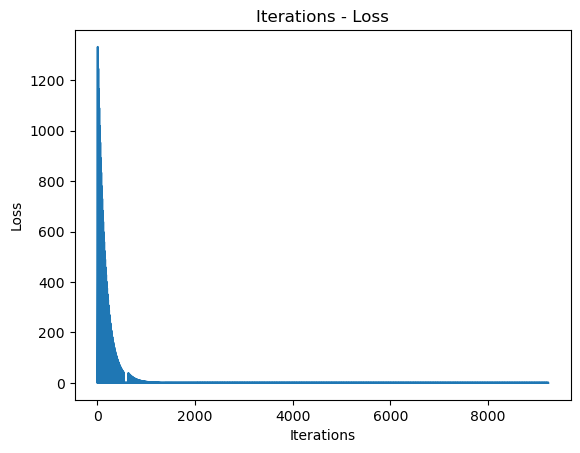

In [226]:
plt.plot(loss_history)
plt.title('Iterations - Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

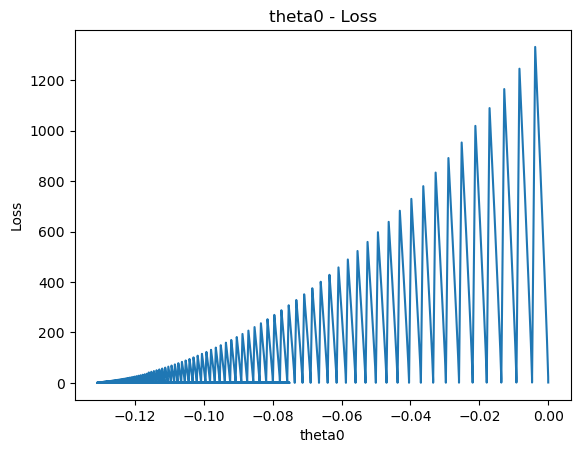

In [227]:
plt.plot(theta0_history,loss_history)
plt.title('theta0 - Loss')
plt.xlabel('theta0')
plt.ylabel('Loss')
plt.show()

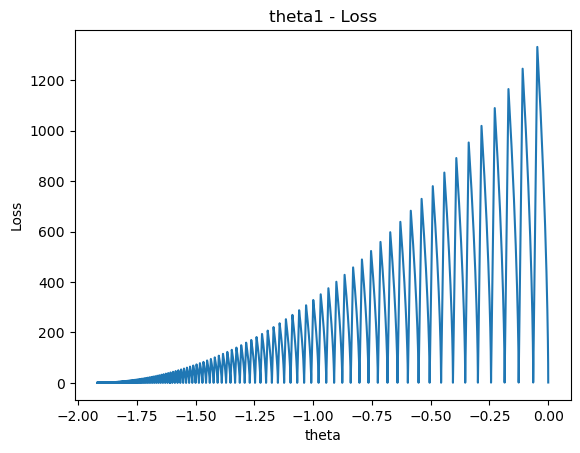

In [228]:
plt.plot(theta1_history,loss_history)
plt.title('theta1 - Loss')
plt.xlabel('theta')
plt.ylabel('Loss')
plt.show()

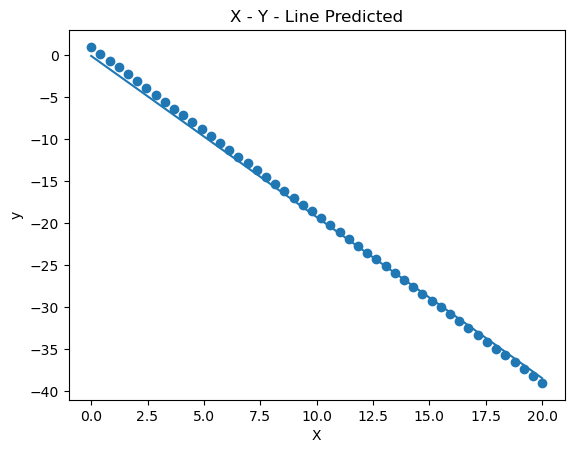

In [229]:
plt.scatter(X,y)
plt.plot(X, y_predic)
plt.title('X - Y - Line Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

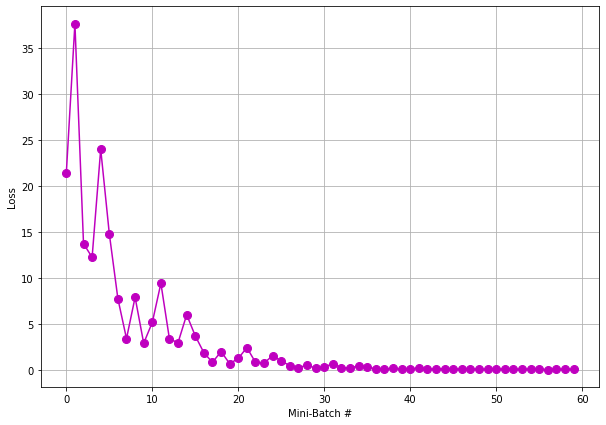

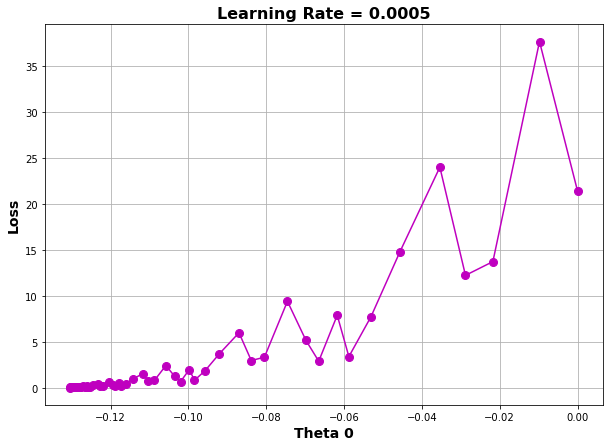

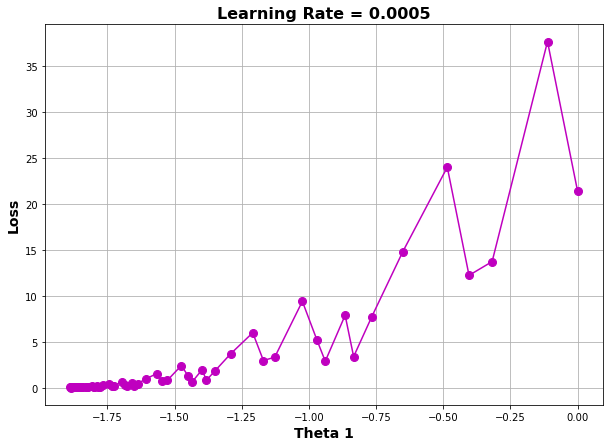

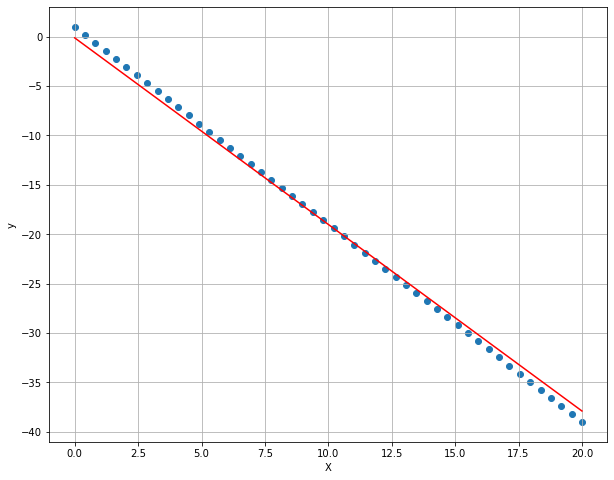

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [231]:

theta0_history, theta1_history, loss_history, y_pred, loss,theta0, theta1, num_iterations \
= miniBatch(X,y, 0.0005, 300, 10,10)
  

theta0: -0.04352471300798937
theta1: -0.5814417852897844
theta0: -0.0736338215915971
theta1: -0.9866822720657593
theta0: -0.09439333252111239
theta1: -1.2691226987759703
theta0: -0.10863696961724198
theta1: -1.465980014397091
theta0: -0.11833964119414762
theta1: -1.6031918438137656
theta0: -0.12487772089137811
theta1: -1.6988349075318527
theta0: -0.1292104453103547
theta1: -1.7655074224564395
theta0: -0.13200633555021085
theta1: -1.8119894695304644
theta0: -0.133731304225247
theta1: -1.8444001544949102
theta0: -0.13471005992796942
theta1: -1.8670040684544007
theta0: -0.13516890186894964
theta1: -1.8827733347994842
theta0: -0.1352655447643015
theta1: -1.8937793168192916
theta0: -0.13510990470783524
theta1: -1.9014656106630323
theta0: -0.13477858547822458
theta1: -1.9068383024466142
theta0: -0.13432497448753286
theta1: -1.9105985642229633
theta0: -0.13378627895512965
theta1: -1.913235064150859
theta0: -0.13318842963152228
theta1: -1.9150883699551886
theta0: -0.13254949835279642
theta1: -

****************** Epoch 0 ********************

Cost = 20.546693404981852

Gradient Vector:
[[ 11.3640554]
 [144.4464855]]

Gradient Vector Norm:
144.8928187653709

theta_0_new : -0.03556645446619147
theta_1_new : -0.49608546827123884

****************** Epoch 1 ********************

Cost = 10.134792627823595

Gradient Vector:
[[  7.86063891]
 [101.34687856]]

Gradient Vector Norm:
101.65126382467814

theta_0_new : -0.06610831986207243
theta_1_new : -0.9173004597389164

****************** Epoch 2 ********************

Cost = 5.000123835308404

Gradient Vector:
[[ 5.39703213]
 [71.03829803]]

Gradient Vector Norm:
71.24301890211146

theta_0_new : -0.0873694115666721
theta_1_new : -1.2135255550617288

****************** Epoch 3 ********************

Cost = 2.4709279242218796

Gradient Vector:
[[ 3.66464568]
 [49.72468931]]

Gradient Vector Norm:
49.85954627699759

theta_0_new : -0.10210416848885694
theta_1_new : -1.4218545973116214

****************** Epoch 4 ********************

Cost 

r2_score 0.9975250349737704


In [232]:
y_predict=theta0 + theta1 * X
r2_score(y,y_predict)

0.9983399422993555

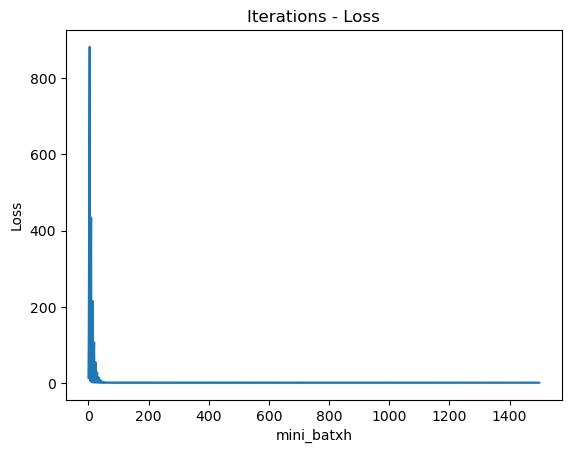

In [233]:
plt.plot(loss_history)
plt.title('Iterations - Loss')
plt.xlabel('mini_batxh')
plt.ylabel('Loss')
plt.show()

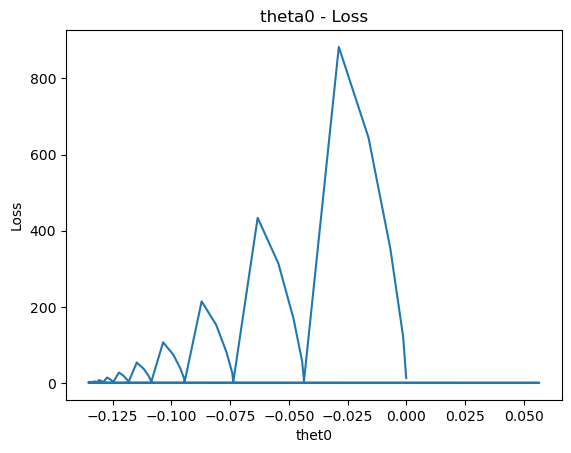

In [234]:
plt.plot(theta0_history,loss_history)
plt.title('theta0 - Loss')
plt.xlabel('thet0')
plt.ylabel('Loss')
plt.show()

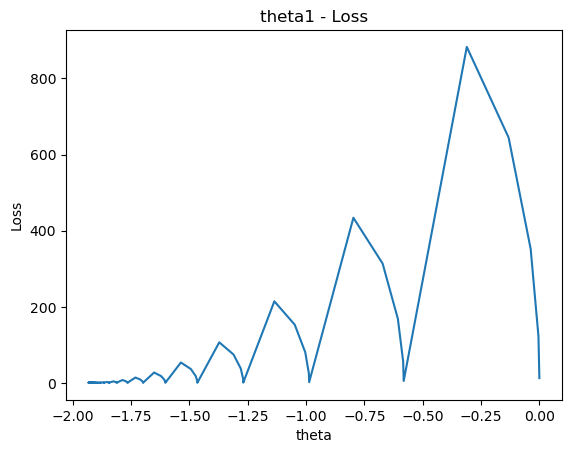

In [235]:
plt.plot(theta1_history,loss_history)
plt.title('theta1 - Loss')
plt.xlabel('theta')
plt.ylabel('Loss')
plt.show()

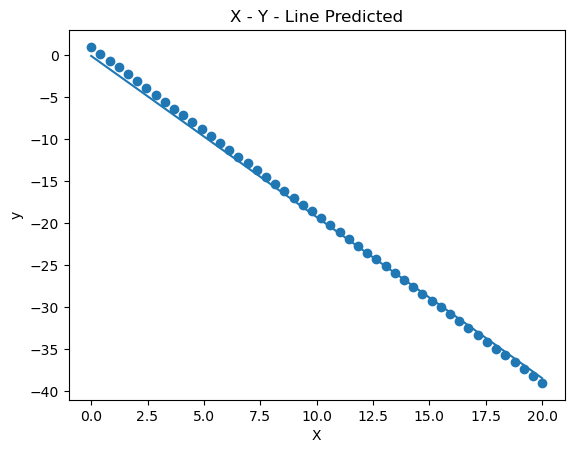

In [236]:
plt.scatter(X,y)
plt.plot(X, y_predic)
plt.title('X - Y - Line Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

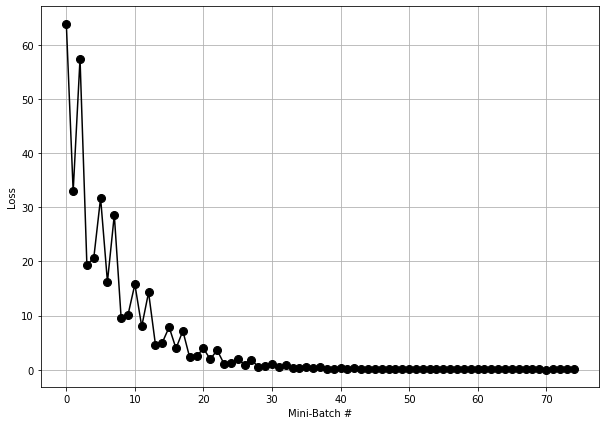

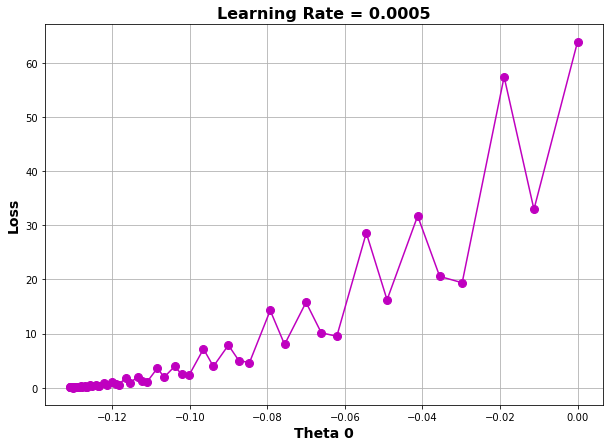

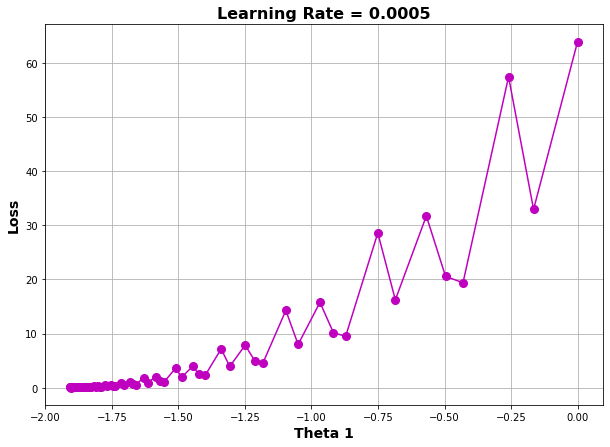

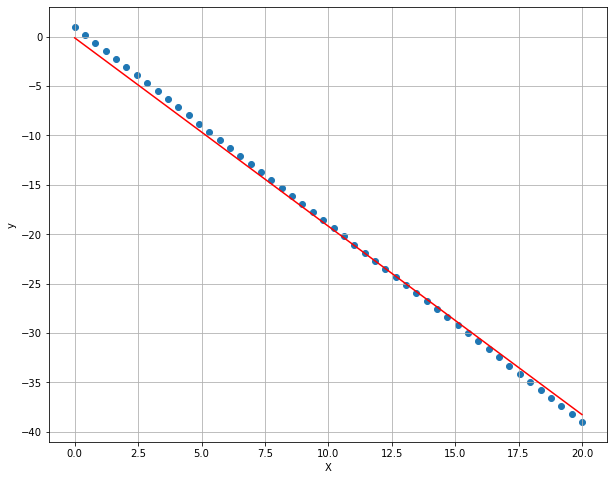

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [237]:
miniBatch(X,y,.0005,300,10,20)

theta0: -0.044118371843354556
theta1: -0.5894102287287779
theta0: -0.07445141295914147
theta1: -0.9977154500354228
theta0: -0.09523540023748842
theta1: -1.2805678652137245
theta0: -0.10940483432328811
theta1: -1.4765181710662236
theta0: -0.11899246570320601
theta1: -1.6122707241058536
theta0: -0.1254063957732405
theta1: -1.7063238321713508
theta0: -0.12962202682432855
theta1: -1.7714914117031735
theta0: -0.13231502723550922
theta1: -1.8166497586313841
theta0: -0.1339534374594349
theta1: -1.847947549656906
theta0: -0.13486147252861444
theta1: -1.869644019204665
theta0: -0.13526371852951152
theta1: -1.8846895708788507
theta0: -0.13531574783128264
theta1: -1.8951279713680547
theta0: -0.1351253264841006
theta1: -1.902374953176691
theta0: -0.13476710474286407
theta1: -1.9074112048244083
theta0: -0.13429279330303573
theta1: -1.9109160566031531
theta0: -0.1337382124554504
theta1: -1.9133600857026891
theta0: -0.13312817508866437
theta1: -1.9150692644748677
theta0: -0.13247986918126733
theta1: 

([0,
  -0.0067551020408163276,
  -0.029381194646788334,
  -0.044118371843354556,
  -0.048543887278481246,
  -0.06417928930163402,
  -0.07445141295914147,
  -0.07726337102563681,
  -0.08805629388065046,
  -0.09523540023748842,
  -0.09692979964560587,
  -0.10436832545838684,
  -0.10940483432328811,
  -0.11032525698891212,
  -0.11544019138119901,
  -0.11899246570320601,
  -0.11937691328688828,
  -0.1228823030199693,
  -0.1254063957732405,
  -0.12541973370170081,
  -0.12781020430100828,
  -0.12962202682432855,
  -0.12937845850722662,
  -0.13099664076416997,
  -0.13231502723550922,
  -0.13189366212378467,
  -0.13297689893874562,
  -0.1339534374594349,
  -0.13340907515595887,
  -0.13412177571837267,
  -0.13486147252861444,
  -0.1342320730224351,
  -0.13468812479373818,
  -0.13526371852951152,
  -0.1345755768830844,
  -0.13485387054521802,
  -0.13531574783128264,
  -0.13458707872508544,
  -0.13474226242864054,
  -0.1351253264841006,
  -0.13436874725754364,
  -0.1344386761700245,
  -0.13476710

****************** Epoch 0 ********************

Cost = 126.72088226258258

Gradient Vector:
[[ 17.21715959]
 [235.70388854]]

Gradient Vector Norm:
236.33187186393872

theta_0_new : -0.009846938775510206
theta_1_new : -0.13414348188254893

****************** Epoch 1 ********************

Cost = 95.59398940231527

Gradient Vector:
[[ 14.91075625]
 [204.69367855]]

Gradient Vector Norm:
205.2360413974638

theta_0_new : -0.026989538964647383
theta_1_new : -0.368489811723319

****************** Epoch 2 ********************

Cost = 72.11939213555958

Gradient Vector:
[[ 12.90783478]
 [177.76372394]]

Gradient Vector Norm:
178.23174169414992

theta_0_new : -0.04183877440396801
theta_1_new : -0.5720041697731717

****************** Epoch 3 ********************

Cost = 54.41582999784645

Gradient Vector:
[[ 11.1684637 ]
 [154.37715357]]

Gradient Vector Norm:
154.78061934303537

theta_0_new : -0.05469641056857394
theta_1_new : -0.7487433593228348

****************** Epoch 4 *******************

r2_score 0.9975552566241764


In [238]:
y_predict=theta0 + theta1 * X
r2_score(y,y_predict)

0.9983399422993555

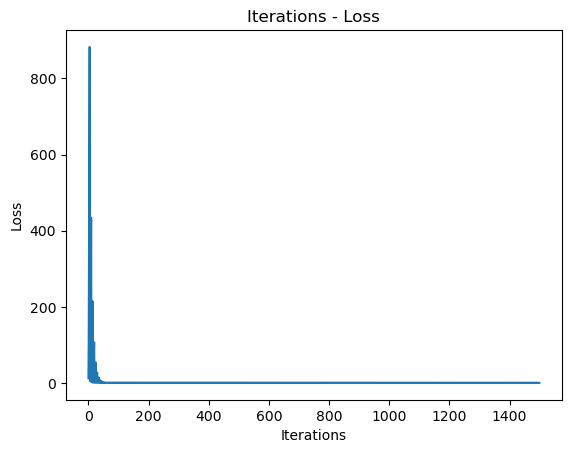

In [239]:
plt.plot(loss_history)
plt.title('Iterations - Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

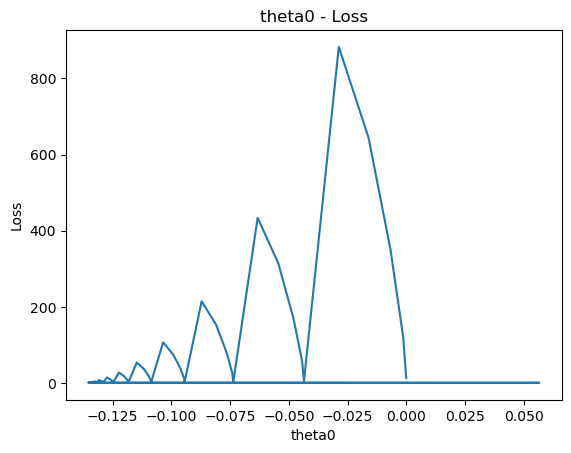

In [240]:
plt.plot(theta0_history,loss_history)
plt.title('theta0 - Loss')
plt.xlabel('theta0')
plt.ylabel('Loss')
plt.show()

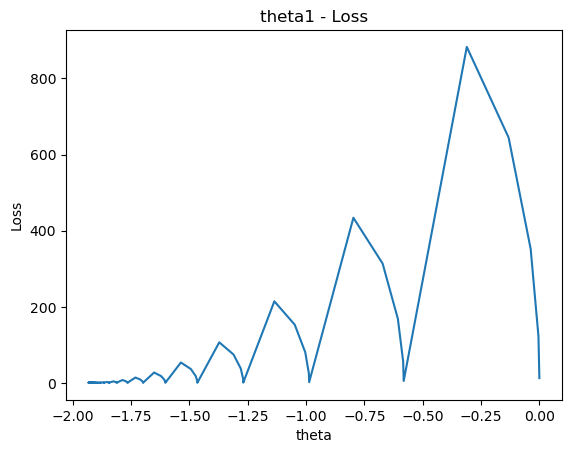

In [241]:
plt.plot(theta1_history,loss_history)
plt.title('theta1 - Loss')
plt.xlabel('theta')
plt.ylabel('Loss')
plt.show()

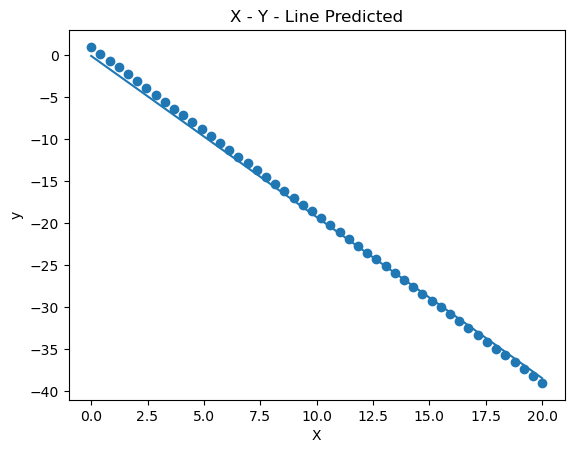

In [242]:
plt.scatter(X,y)
plt.plot(X, y_predic)
plt.title('X - Y - Line Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

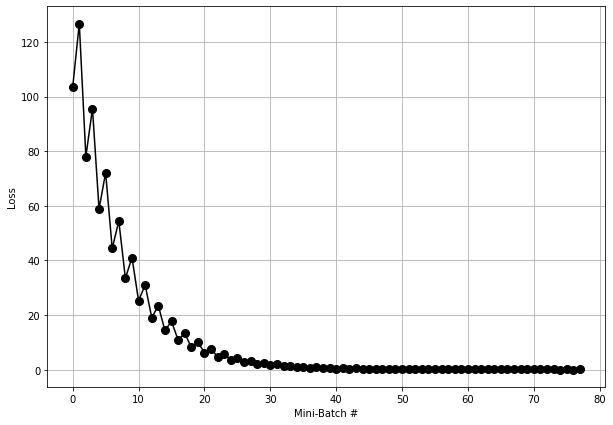

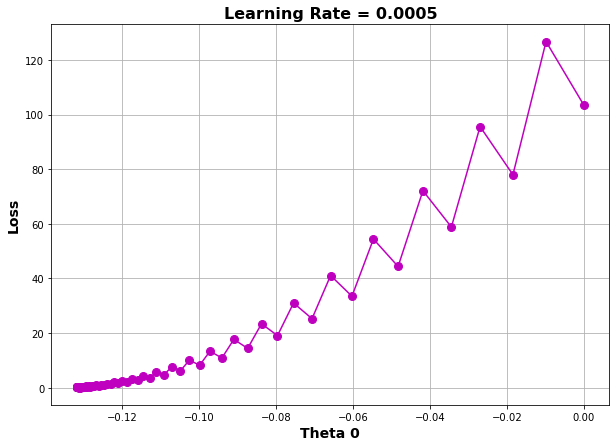

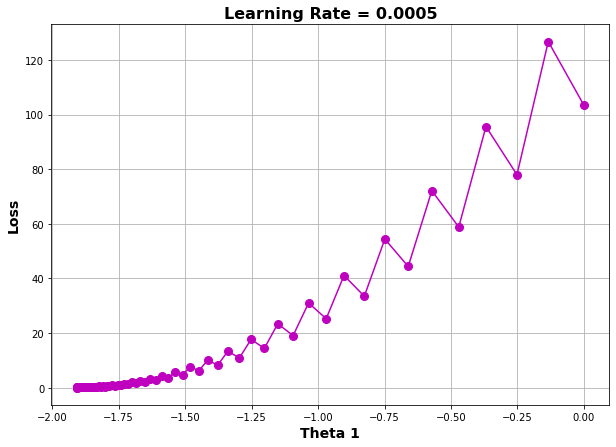

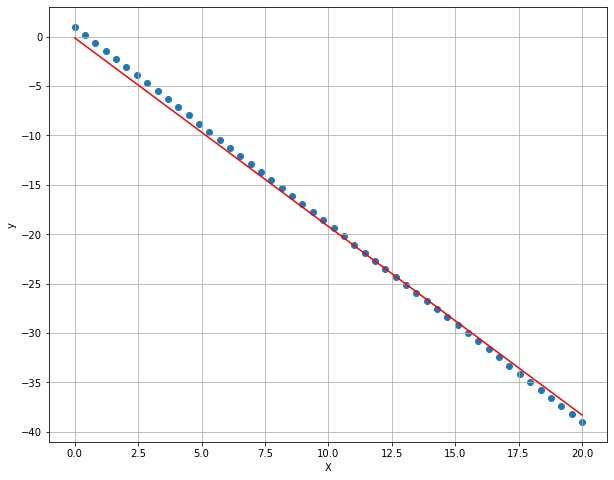